# Models for J1257 QPO
Notebook to study characteristic frequencies of different QPO models applied to the supermassive black hole 2MASXJ12571076+2724177

Known parameters:
* $M = 10^{6.3} M_\odot$
* $\nu = 3.3 * 10^{-5}$ HZ
* $d = 90$ Mpc

let's look for a range of frequencies and masses around these parameters

## PRECESSING INNER FLOW MODEL

this model assumes a truncated disc and an hot optically thick inner flow misaligned with respect to the spiunning hole and therefore precessing around it.
the precession is assumed to be a solid body one, with a frequency given by the average of the LT freequencies at the different radii covered by the flow.
This freqeuncy therefore depends on the spin nad mass of the compact object, but also on the value of the inner and outer radii of the flow, and on the density distribution, which is generalli assumed to be a power law (with exponent $\zeta$)

$\nu(a, M, r_{in}, r_{out}, \zeta)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from setup import *
from plts_funcs import *

In [2]:
#functions for plots

def select(a_match, n_pick=10):
    a_match = np.array(a_match)
    # Sample a few spin values for clarity
    idx = np.linspace(0, len(a_match)-1, n_pick).astype(int)
    a_sampled = a_match[idx]
    return a_sampled

def plot_nu_vs_r(a_sampled, M, label, title, model):
    plt.figure(figsize=(9,6))

    for a in a_sampled:
        r_grid = np.linspace(r_isco(a), 1e4, 800)
        freq = np.array([model(r, a, M) for r in r_grid])
        plt.plot(r_grid, freq, label=f"a = {a:.5f}")
        
    r_gr0 = np.linspace(r_isco(1), 1e4, 800)
    # Target frequency band
    plt.fill_between(r_gr0, TARGET_MIN, TARGET_MAX, color='gray', alpha=0.2,
                    label="Target range")
    plt.plot(r_gr0, np.ones_like(r_grid)*NU0, label="Target frequency")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("r  [GM/c²]")
    plt.ylabel(label)
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


#### prima massa fix - 1 Rg = 0.02 AU - r_in fissato a ISCO

In [ ]:
# --- 1: definisci parametri (senza rin)
params = {
    "a":   (0, 0.99, 10),
    "rout": (3, 400, 200),
    "zeta": (-0.5, 0.5, 3),
    "M":   (10**6.3, 10**6.4, 1),
}
labels = list(params.keys())

param_vectors, mesh_arrays = create_param_grid(params)
A, ROUT, ZETA, M = mesh_arrays

# --- 2: costruisci r_in da a
RIN = r_isco(A)        # stesso shape della griglia

# --- 3: vincolo di consistenza su r_out
ROUT = np.maximum(ROUT, RIN)

# --- 4: chiama la funzione
freq = nu_solid_vect(A, RIN, ROUT, ZETA, M, n_rad=500)


[0, 0, 0, 0]
(slice(None, None, None), slice(None, None, None), 0, 0)
[1, 1, 1, 1]
(slice(None, None, None), slice(None, None, None), 1, -1)
[2, 2, 2, 2]
(slice(None, None, None), slice(None, None, None), 2, -1)


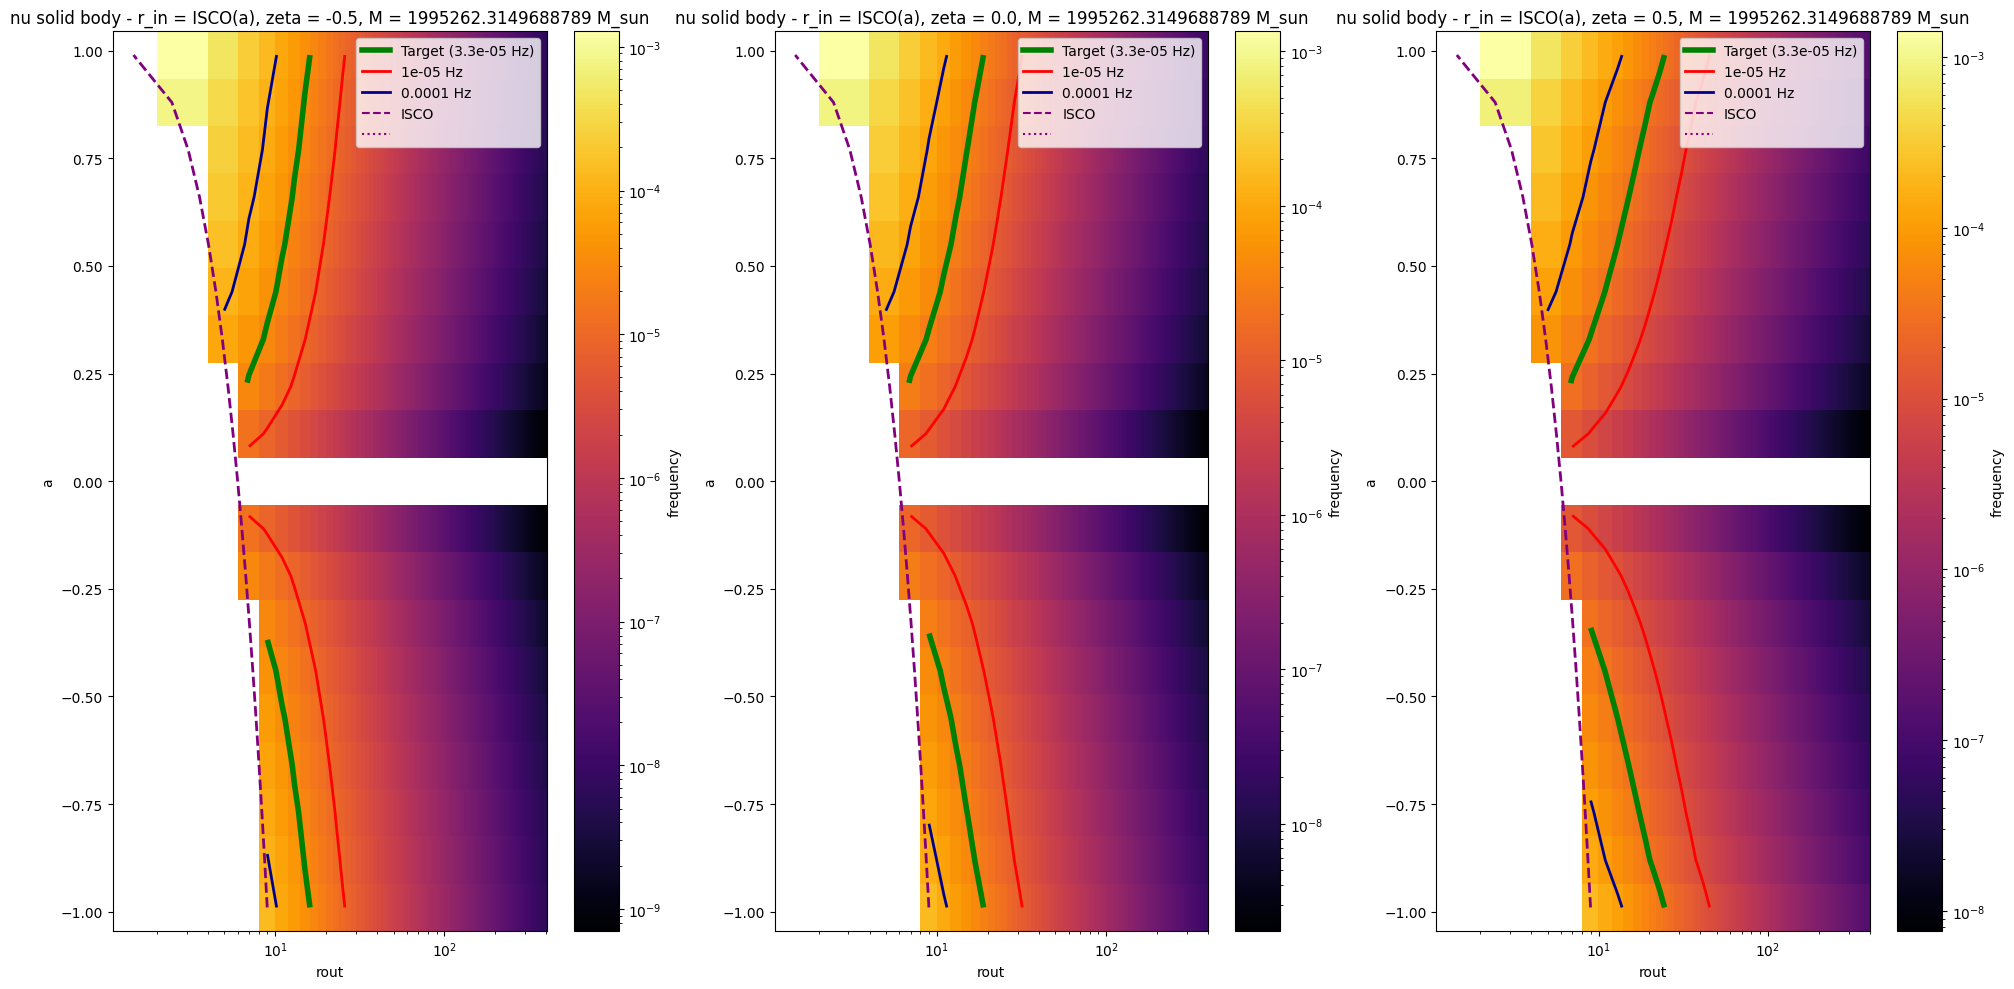

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes = axes.flatten()

idx_values = [0, 1, 2]

for ax, idx in zip(axes, idx_values):
    plt.sca(ax)  # imposta ax come asse corrente
    plot_param_colormap(
        mesh_arrays,
        labels,
        freq,
        x_param="rout",
        y_param="a",
        idx_fix=idx,
        log_x=True,
        title=f"nu solid body - r_in = ISCO(a), zeta = {ZETA[0, 0, idx, 0]}, M = {M[0, 0, 0, 0]} M_sun"
    )

plt.tight_layout()
plt.show()

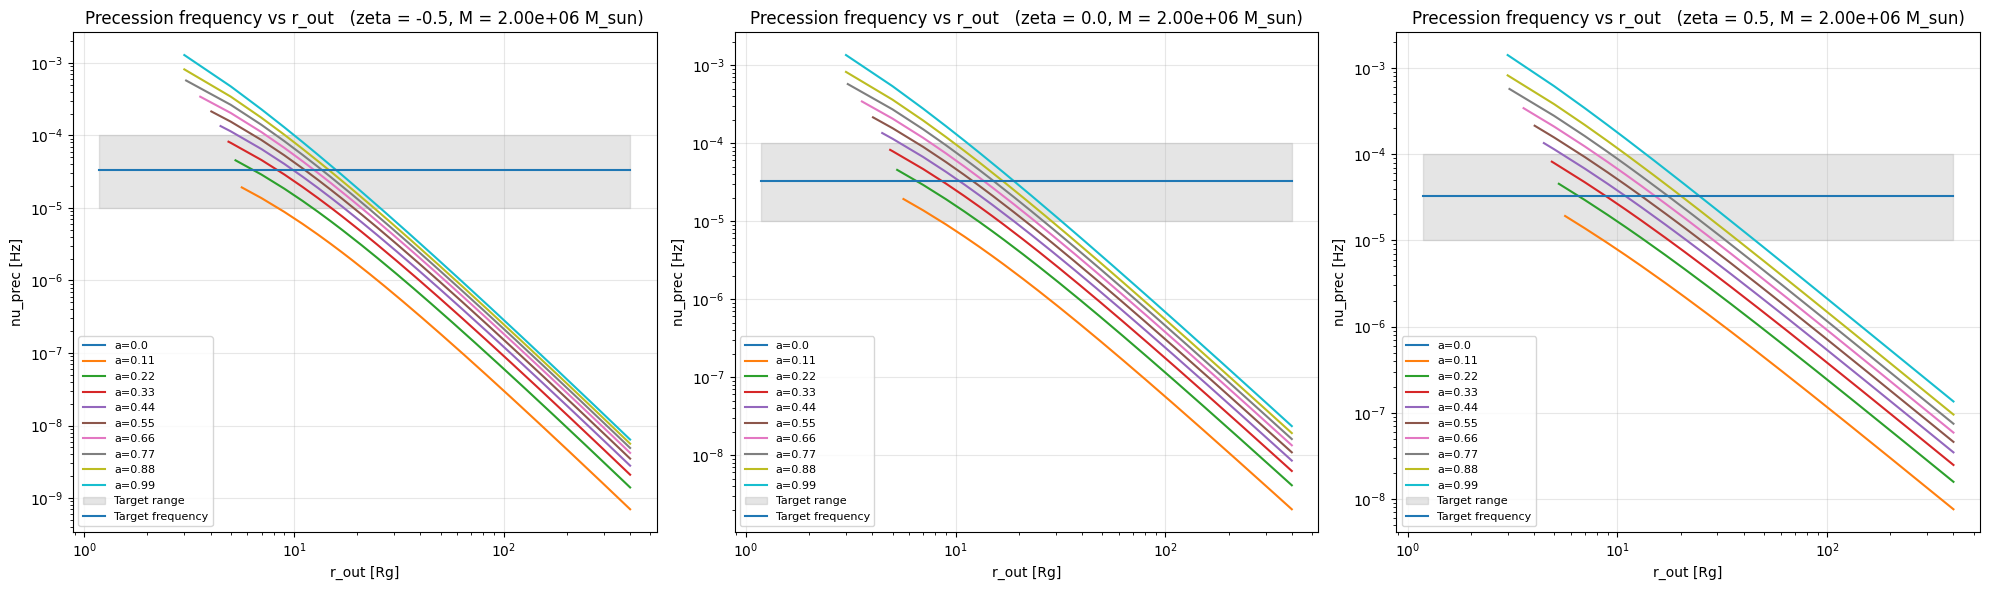

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.flatten()

# Loop over zeta values
for iz in [0,1,2]:
    for ia in range(10):
        rout_vals = ROUT[ia, :, iz, 0]      # vector shape (No,)
        freq_vals = freq[ia, :, iz, 0]    # vector shape (No,)

        # plot only valid positive frequencies
        mask2 = np.isfinite(freq_vals) & (freq_vals > 0)
        
        a = A[ia, 0, iz, 0]

        label = f"a={a}"
        axes[iz].plot(rout_vals[mask2], freq_vals[mask2], label=label)
    

    r_grid = np.linspace(r_isco(0.999), 400, 100)
    # Target frequency band
    axes[iz].fill_between(r_grid, TARGET_MIN, TARGET_MAX, color='gray', alpha=0.2,
                    label="Target range")
    axes[iz].plot(r_grid, np.ones_like(r_grid)*NU0, label="Target frequency")

    axes[iz].set_title(f"Precession frequency vs r_out   (zeta = {ZETA[0, 0, iz, 0] }, M = {M[0,0,0,0]:.2e} M_sun)")
    axes[iz].set_xlabel("r_out [Rg]")
    axes[iz].set_ylabel("nu_prec [Hz]")
    axes[iz].set_xscale("log")
    axes[iz].set_yscale("log")
    axes[iz].grid(True, alpha=0.3)
    axes[iz].legend(fontsize=8)

plt.tight_layout()
plt.show()


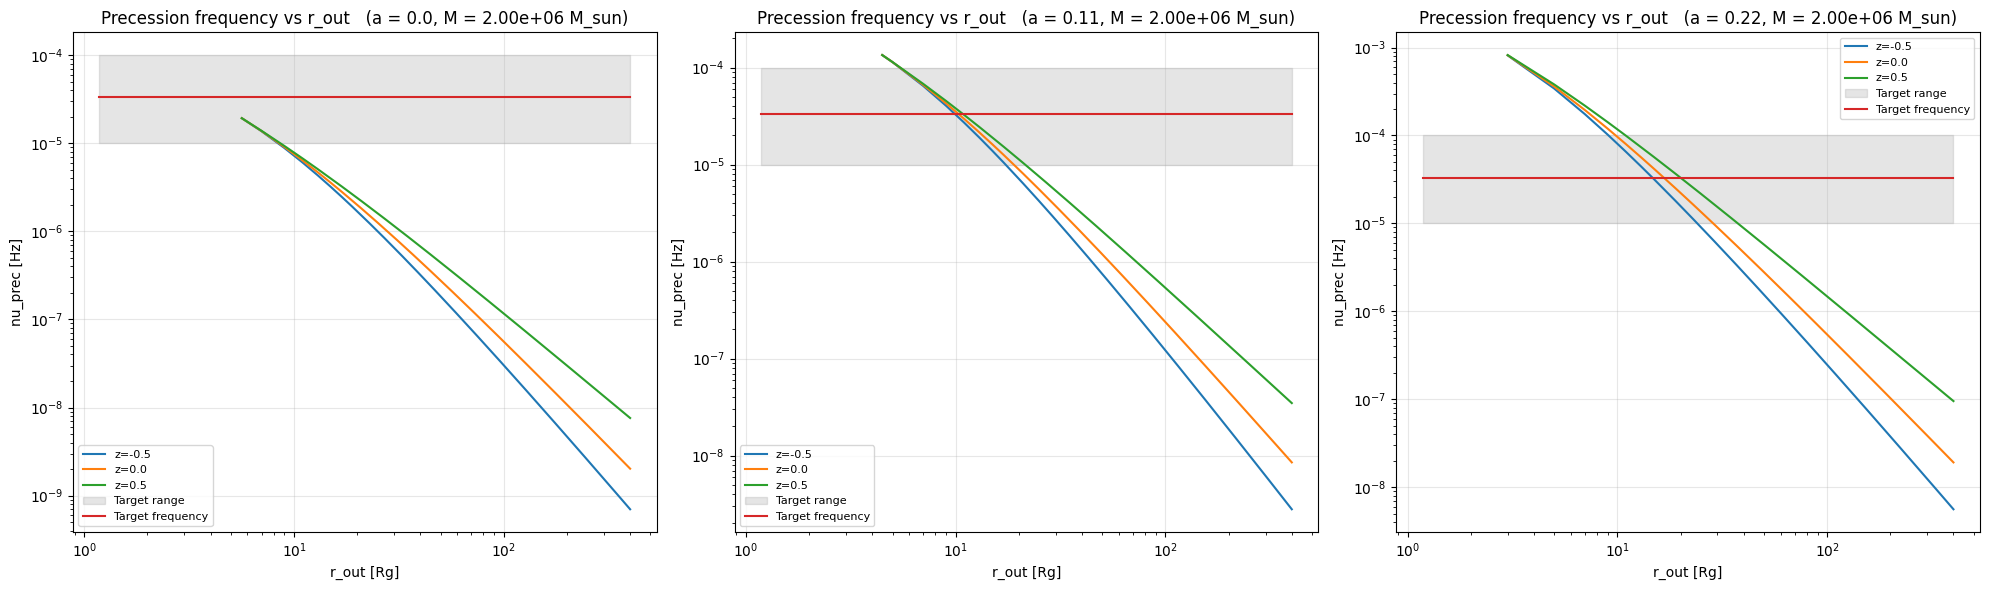

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.flatten()

AAs = [1, 4, 8]

# Loop over zeta values
for i, ia in enumerate(AAs):
    for iz in [0,1,2]:
        rout_vals = ROUT[ia, :, iz, 0]      # vector shape (No,)
        freq_vals = freq[ia, :, iz, 0]    # vector shape (No,)

        # plot only valid positive frequencies
        mask2 = np.isfinite(freq_vals) & (freq_vals > 0)
        
        a = ZETA[ia, 0, iz, 0] 

        label = f"z={a}"
        axes[i].plot(rout_vals[mask2], freq_vals[mask2], label=label)
    

    r_grid = np.linspace(r_isco(0.999), 400, 100)
    # Target frequency band
    axes[i].fill_between(r_grid, TARGET_MIN, TARGET_MAX, color='gray', alpha=0.2,
                    label="Target range")
    axes[i].plot(r_grid, np.ones_like(r_grid)*NU0, label="Target frequency")

    axes[i].set_title(f"Precession frequency vs r_out   (a = {A[i, 0, 0, 0] }, M = {M[0,0,0,0]:.2e} M_sun)")
    axes[i].set_xlabel("r_out [Rg]")
    axes[i].set_ylabel("nu_prec [Hz]")
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()


- colormpa
- commenit
- mase diverse
- sistema matching
- varia rin